In [1]:
import os
import json
import csv
from tqdm import tqdm
import gzip
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the compressed json file
with gzip.open('../../data/fnames_all.json.gz', 'rt', encoding='utf-8') as gz_file:
    fnames_json = json.load(gz_file)
    print(len(fnames_json))

1038240


In [3]:
with gzip.open('../../data/fnames_new_union.json.gz', 'rt', encoding='utf-8') as gz_file:
    fnames_json = json.load(gz_file)
    print(len(fnames_json))
    count_dem, count_co, count_no2, count_so2, count_o3, count_s3, count_s1, count_s2 = 0, 0, 0, 0, 0, 0, 0, 0
    for grid_id in tqdm(fnames_json.keys()):
        if not fnames_json[grid_id]['dem'] == []:
            count_dem += 1
        if not fnames_json[grid_id]['s5p_co'] == []:
            count_co += 1
        if not fnames_json[grid_id]['s5p_no2'] == []:
            count_no2 += 1
        if not fnames_json[grid_id]['s5p_so2'] == []:
            count_so2 += 1
        if not fnames_json[grid_id]['s5p_o3'] == []:
            count_o3 += 1
        if not fnames_json[grid_id]['s3_olci'] == []:
            count_s3 += 1
        if not fnames_json[grid_id]['s1_grd'] == {}:
            count_s1 += 1
        if not fnames_json[grid_id]['s2_toa'] == {}:
            count_s2 += 1
    print(count_dem, count_co, count_no2, count_so2, count_o3, count_s3, count_s1, count_s2)

312567


100%|██████████| 312567/312567 [00:00<00:00, 796519.03it/s]

297665 306097 291449 262259 306218 281375 247723 247723


100%|██████████| 312567/312567 [00:00<00:00, 336698.52it/s]


Number of s1 local patches: 1067267
Number of s2 local patches: 1067267
Number of s1 images: 4227387
Number of s2 images: 4218065


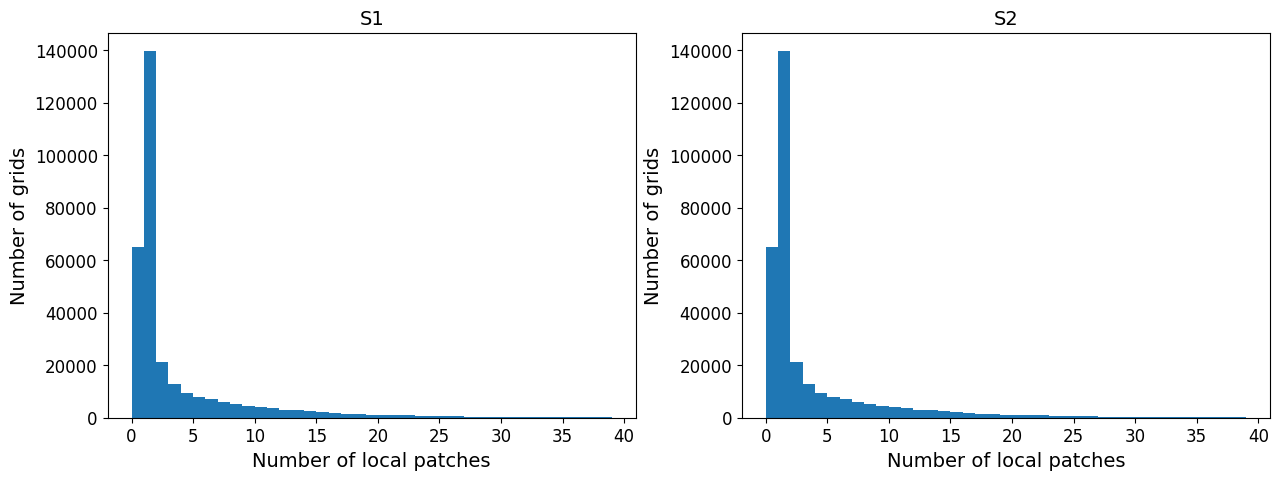

In [11]:
# check the number of s1/s2 local ids for each grid
s1_local_ids = {}
s2_local_ids = {}

count_s1_img = {}
count_s2_img = {}

for grid_id in tqdm(fnames_json.keys()):
    s1_local_ids[grid_id] = len(fnames_json[grid_id]['s1_grd'])
    s2_local_ids[grid_id] = len(fnames_json[grid_id]['s2_toa'])
    for local_id in fnames_json[grid_id]['s1_grd']:
        count_s1_img[local_id] = len(fnames_json[grid_id]['s1_grd'][local_id])
    for local_id in fnames_json[grid_id]['s2_toa']:
        count_s2_img[local_id] = len(fnames_json[grid_id]['s2_toa'][local_id])

print(f"Number of s1 local patches: {sum(s1_local_ids.values())}")
print(f"Number of s2 local patches: {sum(s2_local_ids.values())}")
print(f"Number of s1 images: {sum(count_s1_img.values())}")
print(f"Number of s2 images: {sum(count_s2_img.values())}")
    

# stats of the number of local patches in the grids

# Set global font size
plt.rcParams.update({
    'font.size': 16,          # Base font size
    'axes.titlesize': 14,     # Title font size
    'axes.labelsize': 14,     # Axis labels font size
    'xtick.labelsize': 12,    # X-tick labels font size
    'ytick.labelsize': 12,    # Y-tick labels font size
})

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(list(s1_local_ids.values()), bins=np.arange(0, 40, 1))
axs[0].set_title('S1')
axs[1].hist(list(s2_local_ids.values()), bins=np.arange(0, 40, 1))
axs[1].set_title('S2')
# x-axis
for ax in axs:
    ax.set_xlabel('Number of local patches')
    ax.set_ylabel('Number of grids')

plt.savefig('../output/union_local_patch.pdf', bbox_inches='tight')

Number of s1/2 local patches with 4 seasons: 1008329


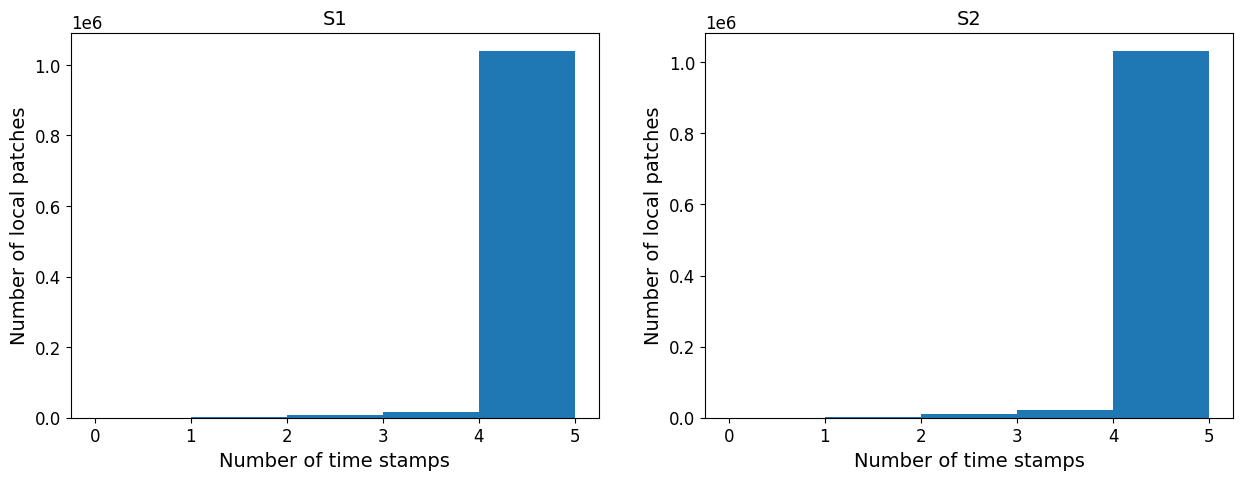

In [21]:
# stats of the number of seasons in local patches
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(list(count_s1_img.values()), bins=np.arange(0, 6, 1))
axs[0].set_title('S1')
axs[1].hist(list(count_s2_img.values()), bins=np.arange(0, 6, 1))
axs[1].set_title('S2')
# x-axis
for ax in axs:
    ax.set_xlabel('Number of time stamps')
    ax.set_ylabel('Number of local patches')
    ax.set_xticks(np.arange(0, 6, 1))
    # y-axis percentage
#axs[0].set_yticklabels(['{:,.0%}'.format(x/sum(count_s1_img.values())) for x in axs[0].get_yticks()])

plt.savefig('../output/union_s12_timestamp.pdf', bbox_inches='tight')

# check local patches that have 4 seasons for both s1 and s2
count_s12_4_seasons = 0
for local_id in count_s1_img.keys():
    if count_s1_img[local_id] == 4 and count_s2_img[local_id] == 4:
        count_s12_4_seasons += 1
print(f"Number of s1/2 local patches with 4 seasons: {count_s12_4_seasons}") # 95% of all local patches


100%|██████████| 312567/312567 [00:00<00:00, 829752.73it/s]


Total number of s5p_co images: 2104735
Total number of s5p_no2 images: 1752558
Total number of s5p_so2 images: 1366452
Total number of s5p_o3 images: 2556631


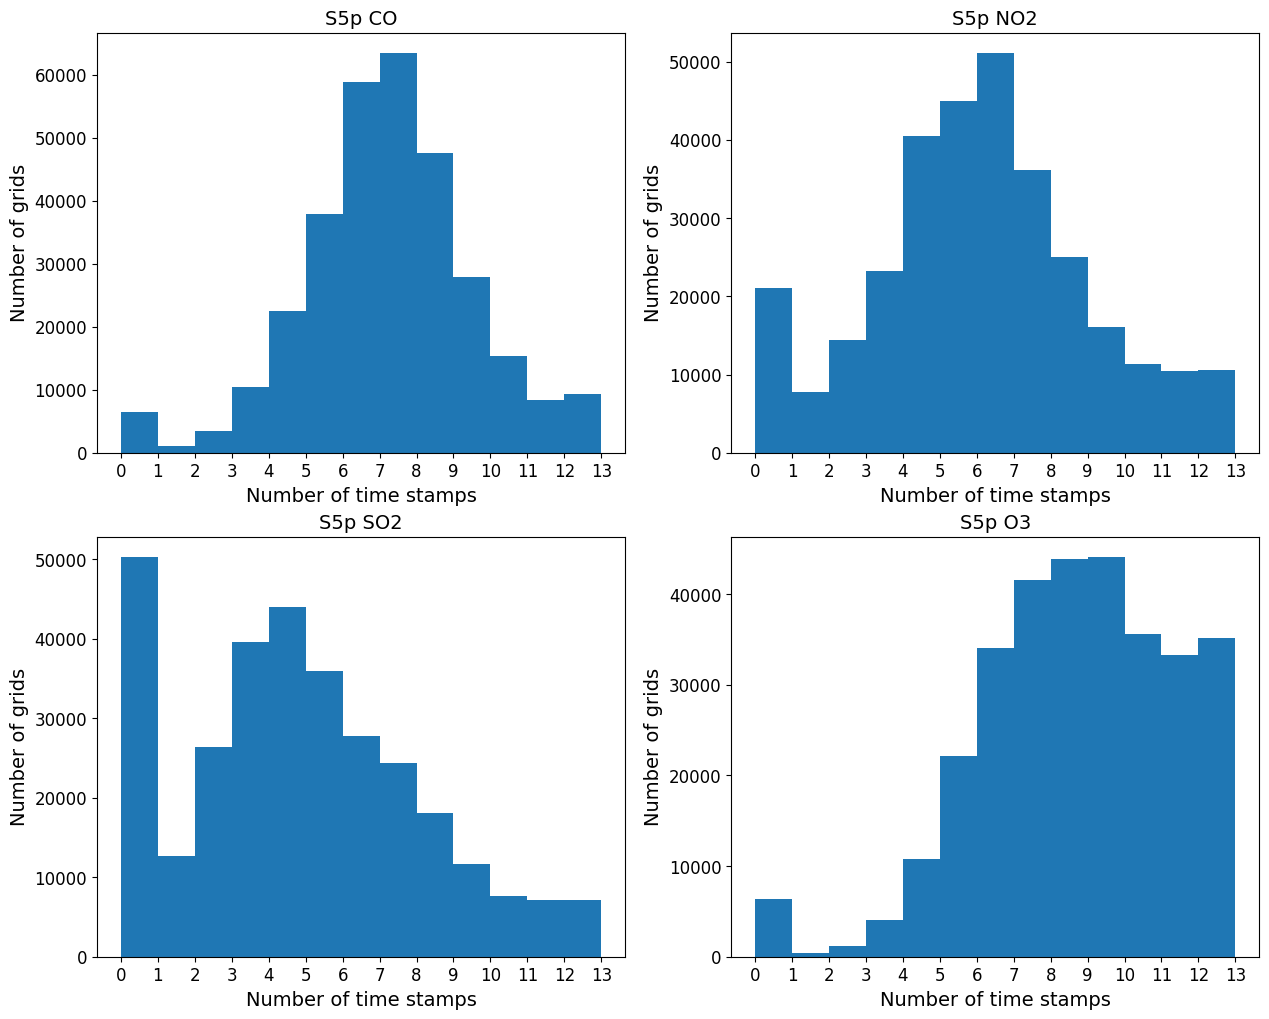

In [34]:
# check the number of images for each s5p product at each grid
s5p_co_count = {}
s5p_no2_count = {}
s5p_so2_count = {}
s5p_o3_count = {}

for grid_id in tqdm(fnames_json.keys()):
    s5p_co_count[grid_id] = len(fnames_json[grid_id]['s5p_co'])
    s5p_no2_count[grid_id] = len(fnames_json[grid_id]['s5p_no2'])
    s5p_so2_count[grid_id] = len(fnames_json[grid_id]['s5p_so2'])
    s5p_o3_count[grid_id] = len(fnames_json[grid_id]['s5p_o3'])

print(f"Total number of s5p_co images: {sum(s5p_co_count.values())}")
print(f"Total number of s5p_no2 images: {sum(s5p_no2_count.values())}")
print(f"Total number of s5p_so2 images: {sum(s5p_so2_count.values())}")
print(f"Total number of s5p_o3 images: {sum(s5p_o3_count.values())}")

# plot the distribution of the number of images for each s5p product
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.size': 16,          # Base font size
    'axes.titlesize': 14,     # Title font size
    'axes.labelsize': 14,     # Axis labels font size
    'xtick.labelsize': 12,    # X-tick labels font size
    'ytick.labelsize': 12,    # Y-tick labels font size
})


fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs[0, 0].hist(list(s5p_co_count.values()), bins=np.arange(0, 14, 1))
axs[0, 0].set_title('S5p CO')
axs[0, 1].hist(list(s5p_no2_count.values()), bins=np.arange(0, 14, 1))
axs[0, 1].set_title('S5p NO2')
axs[1, 0].hist(list(s5p_so2_count.values()), bins=np.arange(0, 14, 1))
axs[1, 0].set_title('S5p SO2')
axs[1, 1].hist(list(s5p_o3_count.values()), bins=np.arange(0, 14, 1))
axs[1, 1].set_title('S5p O3')
# x-axis
for ax in axs.flat:
    ax.set_xlabel('Number of time stamps')
    ax.set_ylabel('Number of grids')
    ax.set_xticks(np.arange(0, 14, 1))

plt.savefig('../output/union_s5p_timestamp.pdf', bbox_inches='tight')

100%|██████████| 312567/312567 [00:00<00:00, 1544494.63it/s]


Total number of s3_olci images: 2189561
Number of grids with 8 s3_olci images: 241520


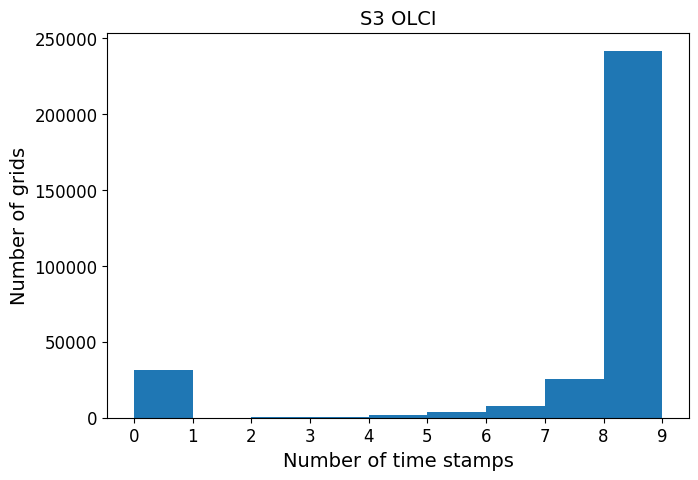

In [36]:
# check the number of images for each s3 product at each grid
s3_olci_count = {}
count_s3_grid_8_images = 0
for grid_id in tqdm(fnames_json.keys()):
    s3_olci_count[grid_id] = len(fnames_json[grid_id]['s3_olci'])
    if s3_olci_count[grid_id] == 8:
        count_s3_grid_8_images += 1

print(f"Total number of s3_olci images: {sum(s3_olci_count.values())}")
print(f"Number of grids with 8 s3_olci images: {count_s3_grid_8_images}")

# plot the distribution of the number of images for s3_olci
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))
ax.hist(list(s3_olci_count.values()), bins=np.arange(0, 10, 1))
ax.set_title('S3 OLCI')
# x-axis
ax.set_xlabel('Number of time stamps')
ax.set_ylabel('Number of grids')
ax.set_xticks(np.arange(0, 10, 1))


plt.savefig('../output/union_s3_timestamp.pdf', bbox_inches='tight')

/tmp/ipykernel_4134/2986437406.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


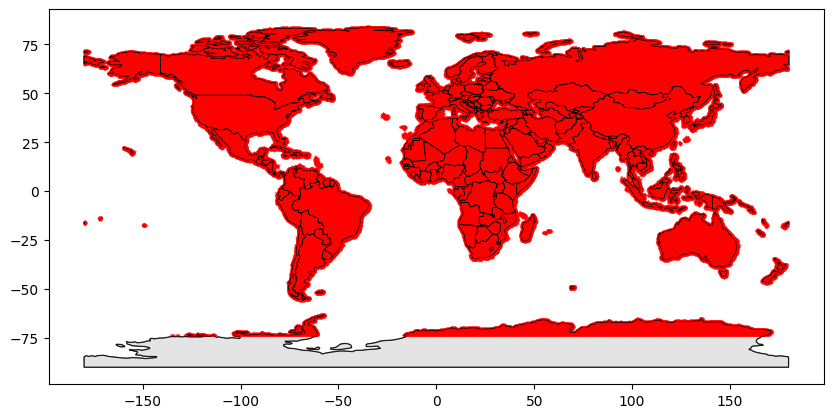

In [8]:
# plot grid coords on map
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

#fnames_to_plot = fnames_json_joint #fnames_json_joint or fnames_json_union or fnames_json
fnames_to_plot = fnames_json

grid_coords = []
for grid_id in fnames_to_plot.keys():
    grid_lon = float(fnames_to_plot[grid_id]['grid_id_coord'].split('_')[1])
    grid_lat = float(fnames_to_plot[grid_id]['grid_id_coord'].split('_')[2])
    grid_coords.append(Point(grid_lon, grid_lat))

gdf = gpd.GeoDataFrame(geometry=grid_coords)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 10))
#world.boundary.plot(ax=ax)
world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.6)
world.boundary.plot(ax=ax, color="black", linewidth=0.5)
gdf.plot(ax=ax, color='red', markersize=0.1)

ax.set_aspect('equal')

# title
#ax.set_title('Grids with at least one modality')
#plt.show()
#plt.savefig('../output/union_dist_new.pdf', bbox_inches='tight')
# save png with higher resolution
plt.savefig('../output/union_dist_new.png', dpi=200, bbox_inches='tight')


## SSL4EO-S-aligned
All modalities available for the grid.

In [9]:
with gzip.open('../../data/fnames_new_joint.json.gz', 'rt', encoding='utf-8') as gz_file:
    fnames_json = json.load(gz_file)
    print(len(fnames_json))

219543


100%|██████████| 219543/219543 [00:00<00:00, 264456.03it/s]


Number of s1 local patches: 996978
Number of s2 local patches: 996978
Number of s1 images: 3948217
Number of s2 images: 3949157


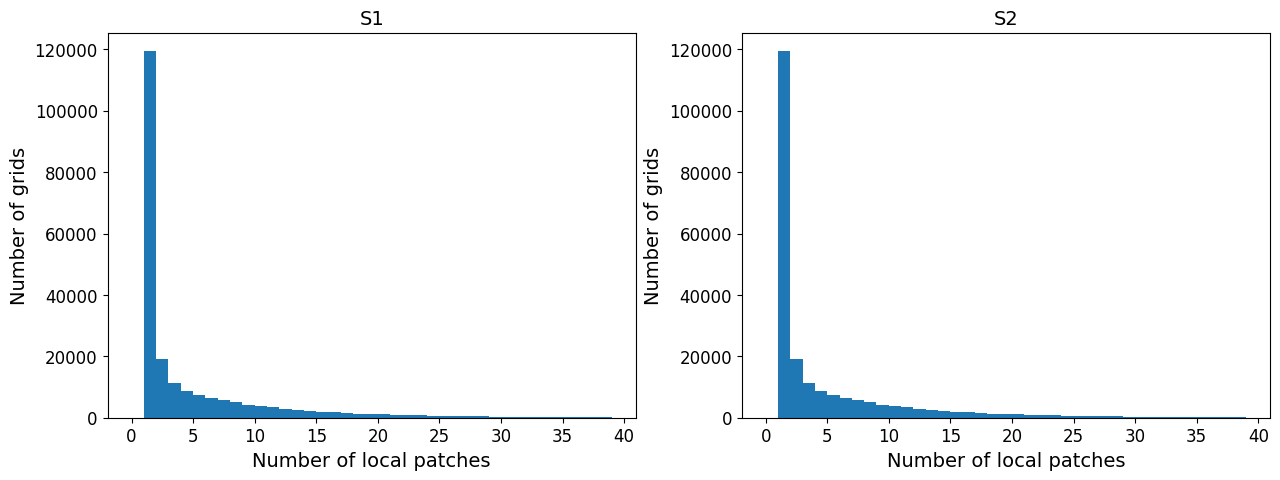

In [39]:
# check the number of s1/s2 local ids for each grid
s1_local_ids = {}
s2_local_ids = {}
count_s1_img = {}
count_s2_img = {}

for grid_id in tqdm(fnames_json.keys()):
    s1_local_ids[grid_id] = len(fnames_json[grid_id]['s1_grd'])
    s2_local_ids[grid_id] = len(fnames_json[grid_id]['s2_toa'])
    for local_id in fnames_json[grid_id]['s1_grd']:
        count_s1_img[local_id] = len(fnames_json[grid_id]['s1_grd'][local_id])
    for local_id in fnames_json[grid_id]['s2_toa']:
        count_s2_img[local_id] = len(fnames_json[grid_id]['s2_toa'][local_id])

print(f"Number of s1 local patches: {sum(s1_local_ids.values())}")
print(f"Number of s2 local patches: {sum(s2_local_ids.values())}")
print(f"Number of s1 images: {sum(count_s1_img.values())}")
print(f"Number of s2 images: {sum(count_s2_img.values())}")
    
# plot the distribution of the number of images for each s5p product
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(list(s1_local_ids.values()), bins=np.arange(0, 40, 1))
axs[0].set_title('S1')
axs[1].hist(list(s2_local_ids.values()), bins=np.arange(0, 40, 1))
axs[1].set_title('S2')
# x-axis
for ax in axs:
    ax.set_xlabel('Number of local patches')
    ax.set_ylabel('Number of grids')

plt.savefig('../output/joint_local_patch.pdf', bbox_inches='tight')

Number of s1/2 local patches with 4 seasons: 947575


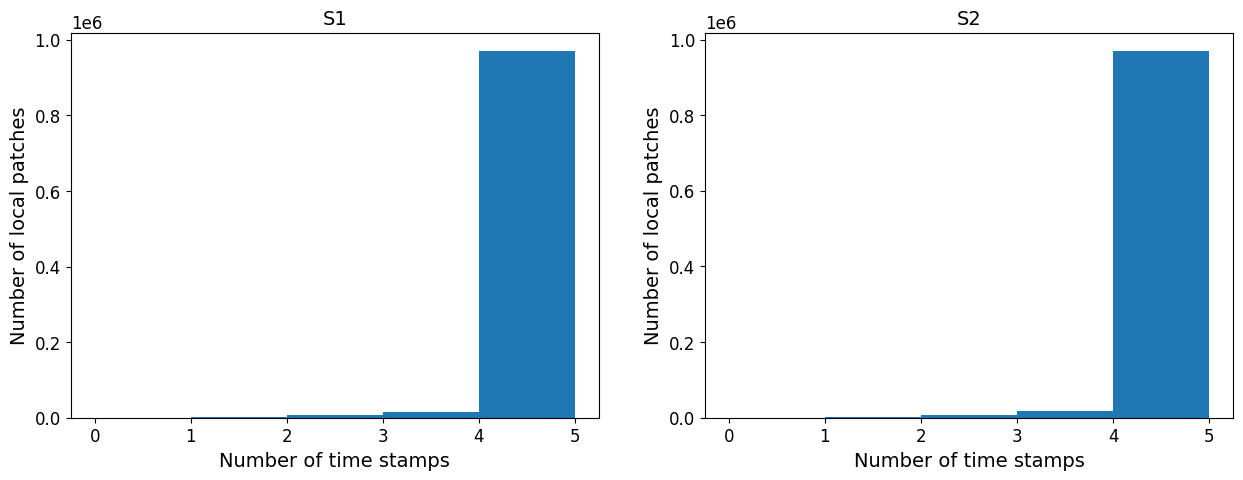

In [40]:
# stats of the number of seasons in local patches
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(list(count_s1_img.values()), bins=np.arange(0, 6, 1))
axs[0].set_title('S1')
axs[1].hist(list(count_s2_img.values()), bins=np.arange(0, 6, 1))
axs[1].set_title('S2')
# x-axis
for ax in axs:
    ax.set_xlabel('Number of time stamps')
    ax.set_ylabel('Number of local patches')
    ax.set_xticks(np.arange(0, 6, 1))
    # y-axis percentage
#axs[0].set_yticklabels(['{:,.0%}'.format(x/sum(count_s1_img.values())) for x in axs[0].get_yticks()])

# check local patches that have 4 seasons for both s1 and s2
count_s12_4_seasons = 0
for local_id in count_s1_img.keys():
    if count_s1_img[local_id] == 4 and count_s2_img[local_id] == 4:
        count_s12_4_seasons += 1
print(f"Number of s1/2 local patches with 4 seasons: {count_s12_4_seasons}") # 95% of all local patches

plt.savefig('../output/joint_s12_timestamp.pdf', bbox_inches='tight')

100%|██████████| 219543/219543 [00:00<00:00, 887821.76it/s] 


Total number of s5p_co images: 1548349
Total number of s5p_no2 images: 1394800
Total number of s5p_so2 images: 1188864
Total number of s5p_o3 images: 1750542


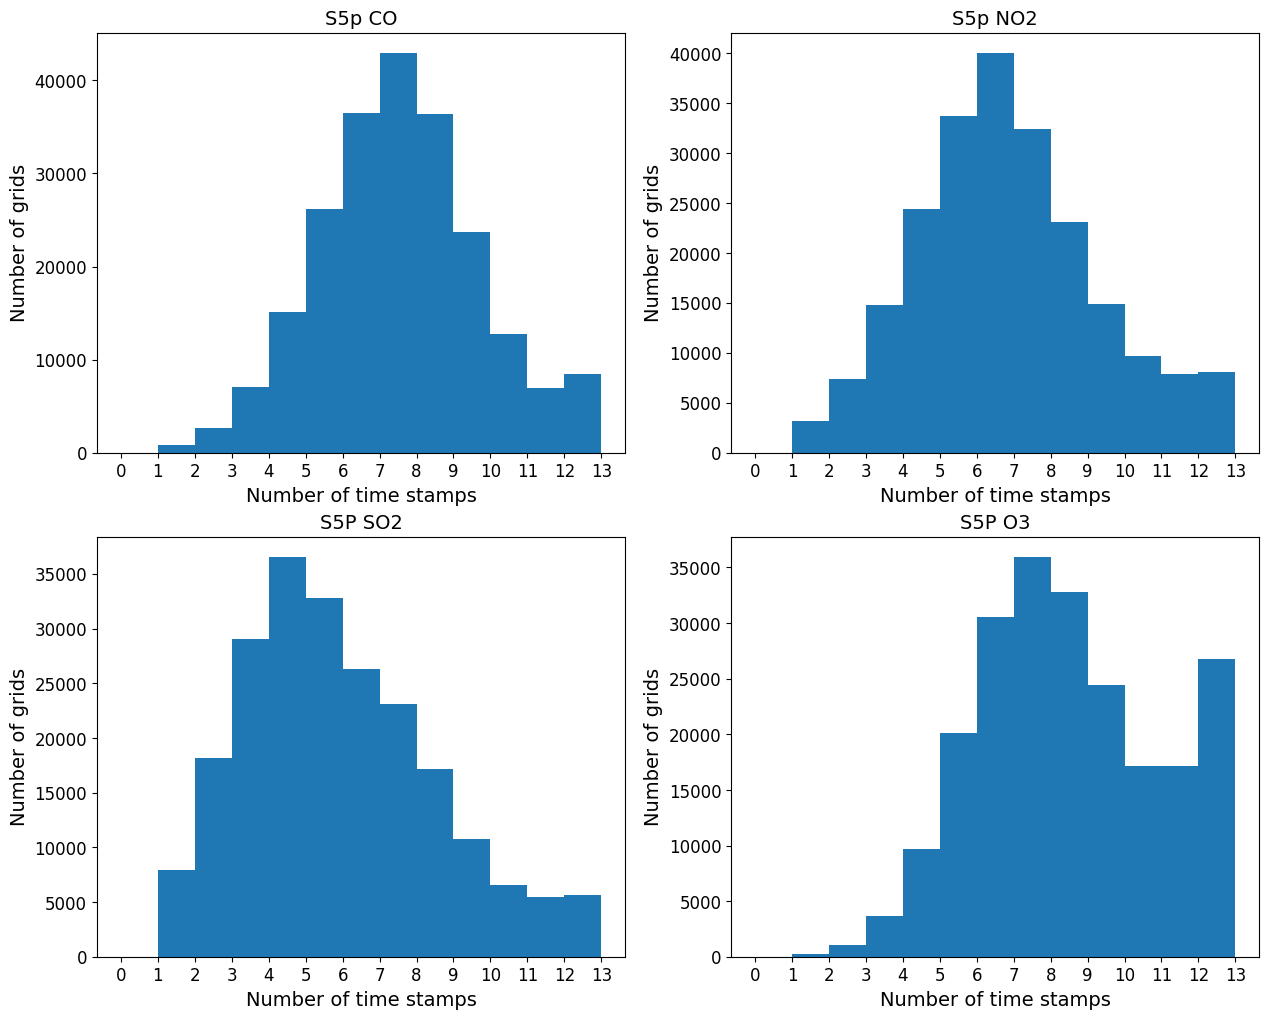

In [41]:
# check the number of images for each s5p product at each grid
s5p_co_count = {}
s5p_no2_count = {}
s5p_so2_count = {}
s5p_o3_count = {}

for grid_id in tqdm(fnames_json.keys()):
    s5p_co_count[grid_id] = len(fnames_json[grid_id]['s5p_co'])
    s5p_no2_count[grid_id] = len(fnames_json[grid_id]['s5p_no2'])
    s5p_so2_count[grid_id] = len(fnames_json[grid_id]['s5p_so2'])
    s5p_o3_count[grid_id] = len(fnames_json[grid_id]['s5p_o3'])

print(f"Total number of s5p_co images: {sum(s5p_co_count.values())}")
print(f"Total number of s5p_no2 images: {sum(s5p_no2_count.values())}")
print(f"Total number of s5p_so2 images: {sum(s5p_so2_count.values())}")
print(f"Total number of s5p_o3 images: {sum(s5p_o3_count.values())}")

# plot the distribution of the number of images for each s5p product
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs[0, 0].hist(list(s5p_co_count.values()), bins=np.arange(0, 14, 1))
axs[0, 0].set_title('S5p CO')
axs[0, 1].hist(list(s5p_no2_count.values()), bins=np.arange(0, 14, 1))
axs[0, 1].set_title('S5p NO2')
axs[1, 0].hist(list(s5p_so2_count.values()), bins=np.arange(0, 14, 1))
axs[1, 0].set_title('S5P SO2')
axs[1, 1].hist(list(s5p_o3_count.values()), bins=np.arange(0, 14, 1))
axs[1, 1].set_title('S5P O3')
# x-axis
for ax in axs.flat:
    ax.set_xlabel('Number of time stamps')
    ax.set_ylabel('Number of grids')
    ax.set_xticks(np.arange(0, 14, 1))

plt.savefig('../output/joint_s5p_timestamp.pdf', bbox_inches='tight')

100%|██████████| 219543/219543 [00:00<00:00, 1596745.03it/s]


Total number of s3_olci images: 1720881
Number of grids with 8 s3_olci images: 196248


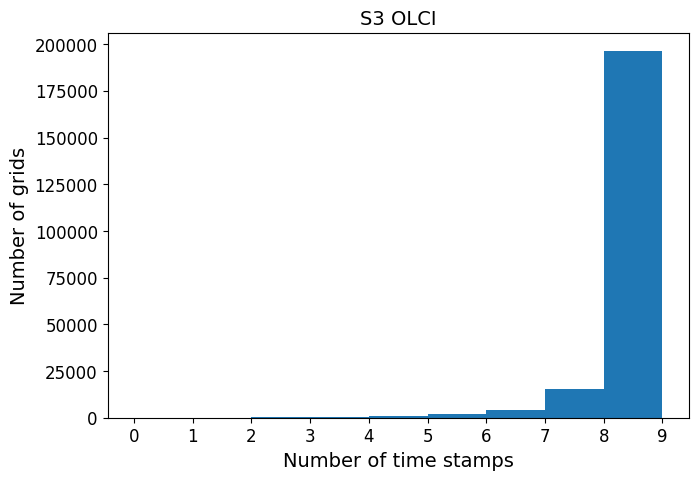

In [42]:
# check the number of images for each s3 product at each grid
s3_olci_count = {}
count_s3_grid_8_images = 0
for grid_id in tqdm(fnames_json.keys()):
    s3_olci_count[grid_id] = len(fnames_json[grid_id]['s3_olci'])
    if s3_olci_count[grid_id] == 8:
        count_s3_grid_8_images += 1

print(f"Total number of s3_olci images: {sum(s3_olci_count.values())}")
print(f"Number of grids with 8 s3_olci images: {count_s3_grid_8_images}")

# plot the distribution of the number of images for s3_olci
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))
ax.hist(list(s3_olci_count.values()), bins=np.arange(0, 10, 1))
ax.set_title('S3 OLCI')
# x-axis
ax.set_xlabel('Number of time stamps')
ax.set_ylabel('Number of grids')
ax.set_xticks(np.arange(0, 10, 1))

plt.savefig('../output/joint_s3_timestamp.pdf', bbox_inches='tight')

/tmp/ipykernel_4134/3297009145.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


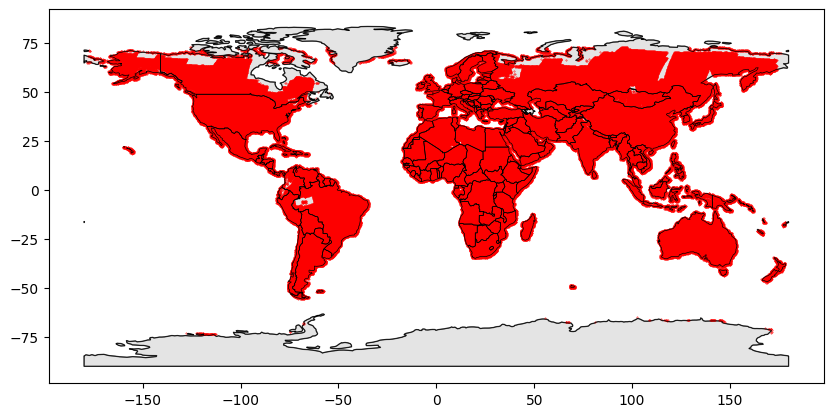

In [ ]:
# plot grid coords on map
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

#fnames_to_plot = fnames_json_joint #fnames_json_joint or fnames_json_union or fnames_json
fnames_to_plot = fnames_json

grid_coords = []
for grid_id in fnames_to_plot.keys():
    grid_lon = float(fnames_to_plot[grid_id]['grid_id_coord'].split('_')[1])
    grid_lat = float(fnames_to_plot[grid_id]['grid_id_coord'].split('_')[2])
    grid_coords.append(Point(grid_lon, grid_lat))

gdf = gpd.GeoDataFrame(geometry=grid_coords)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.6)
world.boundary.plot(ax=ax, color="black", linewidth=0.5)
gdf.plot(ax=ax, color='red', markersize=0.1)

ax.set_aspect('equal')

# title
#ax.set_title('Grids with at least one modality')
#plt.show()
#plt.savefig('../output/union_dist_new.pdf', bbox_inches='tight')
# save png with higher resolution
plt.savefig('../output/joint_dist_new.png', dpi=200, bbox_inches='tight')

